In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
#Reading data

df = pd.read_csv('Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

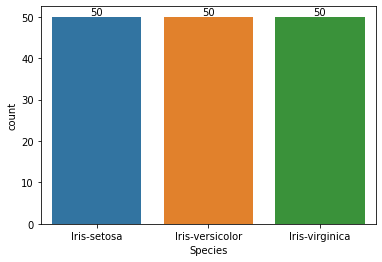

In [9]:
#Target Variable Distribution

ax = sns.countplot(df['Species'])
ax.bar_label(ax.containers[0])

#the dataset is balanced

In [15]:
# Encode the target variable into numbers

def target(x):
    if(x=="Iris-setosa"):
        return 0
    elif(x=="Iris-versicolor"):
        return 1
    else:
        return 2

species = {0:"Iris-setosa",1:"Iris-versicolor",2:"Iris-virginica"}
df['Species'] = df['Species'].apply(target)

[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

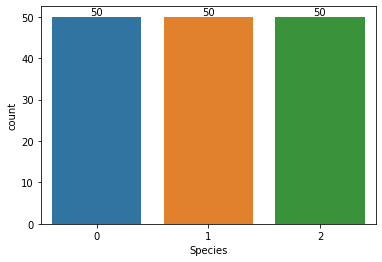

In [16]:
#After encoding target variable Distribution

ax = sns.countplot(df['Species'])
ax.bar_label(ax.containers[0])


### Now Kmeans uses the distance metric that is euclidean or manhanttan, but when we calculating distance, we need to make sure that all the data points hould be on the same scale. So if they are not, we need to scale the data

In [22]:
#without scaling - as this is iris and everything in cm

X = df.drop('Species',axis=1)
y = df.Species

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)

In [28]:
# building the KNN model with as n_neighbours(example) later we find out how to get the k value

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# getting the predictions
y_pred = knn.predict(X_test)

# calculating accuracy
print(np.mean(y_pred!=y_test))

0.0


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
# find the best k - value

error = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    # getting preds
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred!=y_test))

print("Errors with every K-Value", error)

Errors with every K-Value [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.0, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]


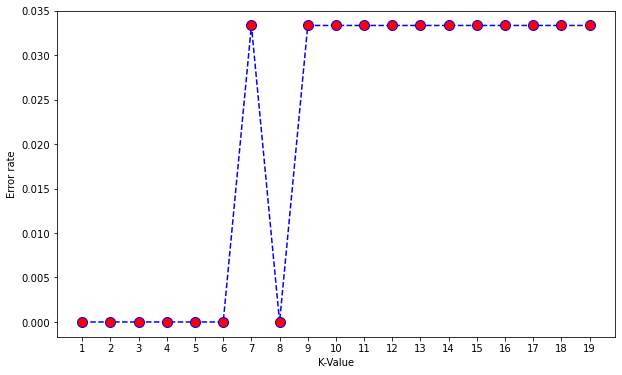

In [46]:
# plotting the curve with errors

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error,color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.xticks(range(1,20))
plt.xlabel('K-Value')
plt.ylabel('Error rate')
plt.show()

We can see there the model is performing well for k=1 to 6 and after that the error is increasing. W ecan select the any k-value between 1 to 6

#-----------------------------------------------------------------------------------------------------------------------------------------------

# The dataset is Iris and the datasize is less. KNN is performing well on the dataset. Lets try another model probably Logistic Regression


In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# getting the predictions
y_pred = lr.predict(X_test)

# calculating accuracy
print(np.mean(y_pred!=y_test))

0.03333333333333333


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

